In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('seaborn-bright')
%matplotlib inline 

import plotly 
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from plotly.subplots import make_subplots

import folium

In [4]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

### INDIA COVID-19 ANALYSIS

In [6]:
Istates = pd.read_excel('Covid cases in India.xlsx')
Istates

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [9]:
Istates.drop('S. No.', axis=1, inplace = True)  ## Dropped the S.no column

In [10]:
Istates

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [18]:
Istates[Istates.isna()].sum() ## No null values 

Name of State / UT                            0.0
Total Confirmed cases (Indian National)       0.0
Total Confirmed cases ( Foreign National )    0.0
Cured                                         0.0
Death                                         0.0
dtype: float64

In [22]:
Istates.dtypes  ## Data Types of columns 

Name of State / UT                            object
Total Confirmed cases (Indian National)        int64
Total Confirmed cases ( Foreign National )     int64
Cured                                          int64
Death                                          int64
dtype: object

In [24]:
Istates.columns ## All the columns 

Index(['Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [27]:
Istates.rename(columns={'Cured': 'Recovered'}, inplace =True) ## changed the column name from cured to recovered 

In [28]:
Istates.sample(3)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death
21,West Bengal,11,0,0,1
22,Bihar,7,0,0,1
11,Puducherry,1,0,0,0


In [35]:
Istates[['Total Confirmed cases (Indian National)','Total Confirmed cases ( Foreign National )']].sum() 
                                                            ## total sum of two columns 

Total Confirmed cases (Indian National)       687
Total Confirmed cases ( Foreign National )     42
dtype: int64

In [36]:
Istates['Total Cases'] = Istates['Total Confirmed cases (Indian National)'] + Istates['Total Confirmed cases ( Foreign National )']
Istates   ## New column added of total cases

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [45]:
total_cases = Istates['Total Cases'].sum()
print('Total Number of cases in all states of India Including local and Foreign nations is ', total_cases)

Total Number of cases in all states of India Including local and Foreign nations is  729


In [71]:
Istates['Active Cases'] = Istates['Total Cases'] - (Istates['Recovered'] + Istates['Death'])
Istates        ## Added another Column Active Cases

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [193]:
Istates.style.set_caption('COVID-19 DATA INDIA(States)')   ## setting the caption on the dataset

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


<AxesSubplot:title={'center':'Total Active cases by states'}, xlabel='Name of State / UT'>

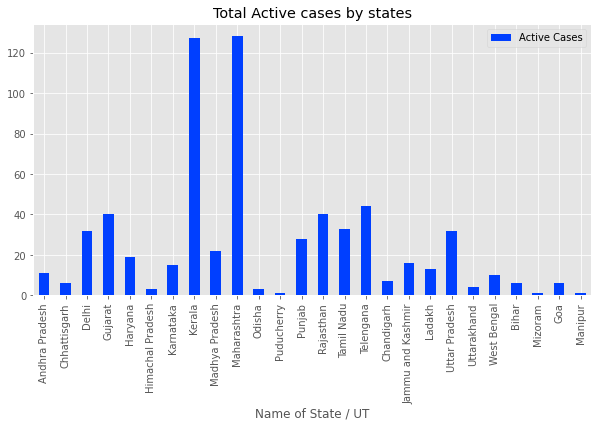

In [74]:
Istates.plot(kind='bar',x = 'Name of State / UT', y = 'Active Cases', figsize= (10,5),title='Total Active cases by states')
                                                                    ## Plotting done for dataframe by pandas builtin functions

In [108]:
Istates.groupby('Name of State / UT')['Total Confirmed cases (Indian National)'].max().sort_values(ascending= False) 
                                                         ## Highest number of confirmed cases by states for Locals only 

Name of State / UT
Maharashtra          144
Kerala               131
Gujarat               43
Uttar Pradesh         42
Rajasthan             41
Delhi                 38
Telengana             34
Tamil Nadu            32
Punjab                29
Madhya Pradesh        23
Karnataka             20
Jammu and Kashmir     18
Haryana               16
Ladakh                13
Andhra Pradesh        12
West Bengal           11
Chandigarh             7
Bihar                  7
Goa                    6
Chhattisgarh           6
Uttarakhand            4
Himachal Pradesh       4
Odisha                 3
Manipur                1
Mizoram                1
Puducherry             1
Name: Total Confirmed cases (Indian National), dtype: int64

In [121]:
Istates.sample(5)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
12,Punjab,29,0,0,1,29,28
10,Odisha,3,0,0,0,3,3
2,Delhi,38,1,6,1,39,32
5,Himachal Pradesh,4,0,0,1,4,3
18,Ladakh,13,0,0,0,13,13


In [129]:
total_case = Istates.groupby('Name of State / UT')['Total Cases'].sum().reset_index()
Death = Istates.groupby('Name of State / UT')['Death'].sum().reset_index()

In [137]:
fig = go.Figure()
fig.add_trace(go.Bar(x=total_case['Name of State / UT'], y=total_case['Total Cases'],name ='Total Cases')) 
fig.add_trace(go.Line(x=Death['Name of State / UT'], y=Death['Death'],name ='Deaths'))
                                    ## Visualization Done by Plotly Graph_objects as go. 

In [145]:
AverageORMean = Istates['Total Cases'].mean()  
print('Average COVID-19 Cases in india ', AverageORMean) ## mean of the total cases or Avg 

Average COVID-19 Cases in india  28.03846153846154


In [146]:
Cord = pd.read_excel('Indian Coordinates.xlsx') ## New Dataframe created

In [166]:
Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [158]:
Cord.count()

Name of State / UT    35
Latitude              35
Longitude             35
dtype: int64

In [165]:
df_All = pd.merge(Cord,Istates,on='Name of State / UT') ## Merged Two dataframe using Merge function  
                                                        ## There are other functions too 
df_All

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [171]:
map = folium.Map(location=[20,70],zoom_start = 4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_All['Latitude'],df_All['Longitude'],df_All['Total Cases'],df_All['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),
                        color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [172]:
map

In [192]:
df_All[df_All['Name of State / UT'] == 'Delhi'] ## filtering 

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
1,Delhi,28.669993,77.230004,38,1,6,1,39,32


In [199]:
megacities = df_All[df_All['Name of State / UT'].isin(['Delhi','Maharashtra','Karnataka','Tamil Nadu'])]

In [200]:
megacities

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Death,Total Cases,Active Cases
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


<BarContainer object of 4 artists>

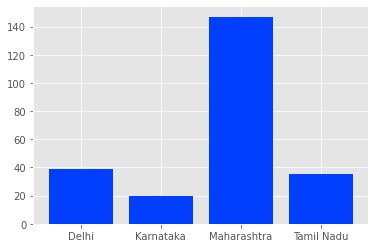

In [207]:
plt.bar(megacities['Name of State / UT'], megacities['Total Cases']) ## visualization through matplotlib

### WORLD COVID-19 ANALYSIS

In [211]:
world = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
world

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [213]:
world.count() ## counting all the rows 

SNo                5890
ObservationDate    5890
Province/State     3575
Country/Region     5890
Last Update        5890
Confirmed          5890
Deaths             5890
Recovered          5890
dtype: int64

In [215]:
world.isnull().sum()   ## we have 2315 null values in ProvinceState column 

SNo                   0
ObservationDate       0
Province/State     2315
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [217]:
world.drop('Province/State',axis=1, inplace=True)  ## Dropped the provice and state column

In [218]:
world

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5885,5886,03/15/2020,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [224]:
world.isnull().sum()  ## Data is clear no null values 

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [225]:
world.rename(columns={'ObservationDate':'Date'},inplace = True)

In [226]:
world.sample(2)

,SNo,Date,Country/Region,Last Update,Confirmed,Deaths,Recovered
4686,4687,03/10/2020,Gibraltar,2020-03-10 08:33:03,1.0,0.0,1.0
454,455,01/31/2020,Mainland China,2020-01-31 23:59:00,29.0,0.0,2.0


In [228]:
world.drop('SNo',axis=1,inplace=True)

In [229]:
world.head(3)

,Date,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


In [240]:
Unique= world['Country/Region'].nunique() 
printing = "We have {} Unique Regions and county in our dataframe".format(Unique)
print(printing)

We have 161 Unique Regions and county in our dataframe


In [244]:
world['AffectedPeople'] = world['Confirmed'] + world['Deaths'] + world['Recovered'] ## newcolumn added aas affectd people 

In [245]:
world.sample(5)

,Date,Country/Region,Last Update,Confirmed,Deaths,Recovered,AffectedPeople
1669,02/17/2020,Mainland China,2020-02-17 02:03:06,72.0,0.0,8.0,80.0
5077,03/12/2020,Afghanistan,2020-03-11 10:13:12,7.0,0.0,0.0,7.0
117,01/24/2020,US,2020-01-24 17:00:00,1.0,0.0,0.0,1.0
3913,03/07/2020,US,2020-03-07 16:43:02,2.0,0.0,0.0,2.0
1437,02/14/2020,Mainland China,2020-02-14 23:23:04,127.0,0.0,38.0,165.0


In [252]:
covid = world['AffectedPeople'].sum()
print('Total affected person from Covid-19 in world',covid)

Total affected person from Covid-19 in world 4836542.0


In [253]:
world['Country/Region'].nunique()

161

### CUMULATIVE OUTCOME

In [261]:
confirmed = world.groupby('Date')['Confirmed'].sum().reset_index()
death =world.groupby('Date')['Deaths'].sum().reset_index()
recovered = world.groupby('Date')['Recovered'].sum().reset_index()   ## Visualization by Plotly group-object

In [268]:
fig = go.Figure()    
fig.add_trace(go.Bar(x=confirmed['Date'],y=confirmed['Confirmed'],name ='Confirmed'))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name ='Death'
                         ,line = dict(color='red',width = 2)))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name ='Recovered'
                         ,line = dict(color='green',width = 2)))

In [282]:
world['AffectedPeople'].max()

125167.0

In [365]:
TOP= world.sort_values(by=['AffectedPeople'],ascending = False).head(50) ## top 50 Country and Region having most affected 
                                                                        ##people 

In [369]:
TOP.style.background_gradient(cmap='Blues') ## as the color gets darker shows the highest value in each columns 

,Date,Country/Region,Last Update,Confirmed,Deaths,Recovered,AffectedPeople
5632,03/15/2020,Mainland China,2020-03-15 18:20:18,67794.000000,3085.000000,54288.000000,125167.000000
5383,03/14/2020,Mainland China,2020-03-14 10:13:09,67790.000000,3075.000000,52960.000000,123825.000000
5153,03/13/2020,Mainland China,2020-03-13 11:09:03,67786.000000,3062.000000,51553.000000,122401.000000
4935,03/12/2020,Mainland China,2020-03-12 09:53:06,67781.000000,3056.000000,50318.000000,121155.000000
4719,03/11/2020,Mainland China,2020-03-11 10:53:02,67773.000000,3046.000000,49134.000000,119953.000000
4513,03/10/2020,Mainland China,2020-03-10 15:13:05,67760.000000,3024.000000,47743.000000,118527.000000
4247,03/09/2020,Mainland China,2020-03-09 14:33:03,67743.000000,3008.000000,46488.000000,117239.000000
3992,03/08/2020,Mainland China,2020-03-08 14:43:03,67707.000000,2986.000000,45235.000000,115928.000000
3767,03/07/2020,Mainland China,2020-03-07 11:13:04,67666.000000,2959.000000,43500.000000,114125.000000
3568,03/06/2020,Mainland China,2020-03-06 14:23:04,67592.000000,2931.000000,42033.000000,112556.000000


In [359]:
Regoin = TOP['Country/Region'].unique()   
print('Top three regions having most affected people by covid-19 are: ', Regoin)

Top three regions having most affected people by covid-19 are:  ['Mainland China' 'Italy' 'Iran']


In [324]:
Italy = world[world['Country/Region'] =='Italy']['Deaths'].sum()
print('Total Deaths in Italy',Italy )

Total Deaths in Italy 8582.0


### CORONA VIRUS GLOBALLY (INDIA,WUHAN,ITALY,KOREA)

In [325]:
India = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name = 'India')
Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name = 'Italy')
Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name = 'Wuhan')
Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name = 'Korea')

In [331]:
Italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             51 non-null     datetime64[ns]
 1   Total Cases                      51 non-null     int64         
 2   New Cases                        51 non-null     int64         
 3   Days after surpassing 100 cases  27 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.7 KB


In [330]:
India.drop('Days after surpassing 100 cases',axis=1,inplace=True)

In [332]:
Italy.drop('Days after surpassing 100 cases',axis=1,inplace=True)

In [333]:
Wuhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         59 non-null     datetime64[ns]
 1   Total Cases  59 non-null     int64         
 2   New Cases    59 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.5 KB


In [334]:
Korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             61 non-null     datetime64[ns]
 1   Total Cases                      61 non-null     int64         
 2   New Cases                        61 non-null     int64         
 3   Days after surpassing 100 cases  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.0 KB


In [335]:
Korea.drop('Days after surpassing 100 cases',axis=1,inplace=True)

In [381]:
India.sample(5)

,Date,Total Cases,New Cases
23,2020-02-22,3,0
50,2020-03-20,244,50
22,2020-02-21,3,0
31,2020-03-01,3,0
37,2020-03-07,34,3


<function matplotlib.pyplot.show(close=None, block=None)>

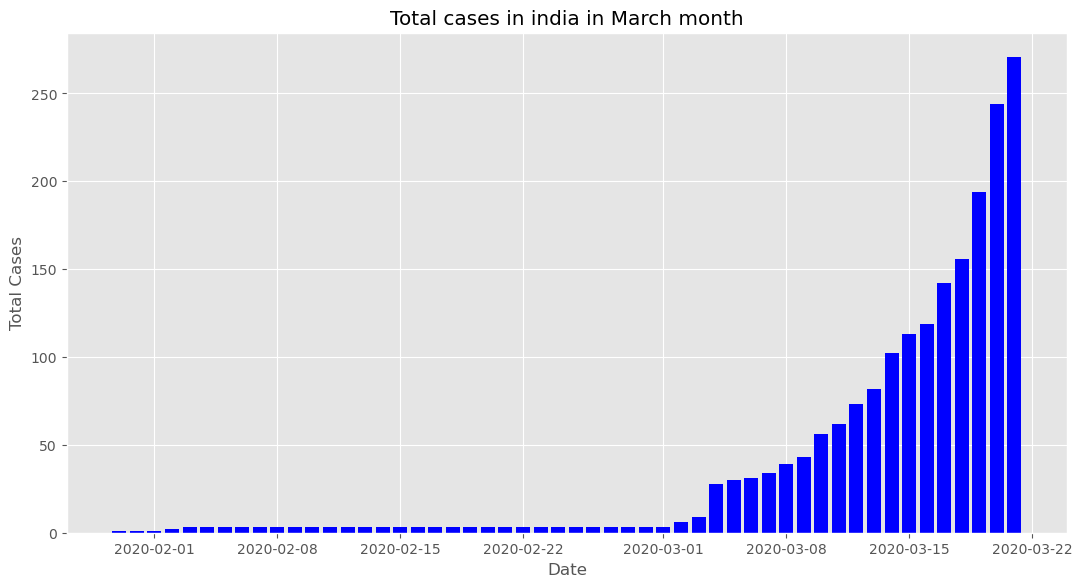

In [387]:
fig=plt.figure(figsize=(10,5),dpi=100)  ## Matplotlib
axes = fig.add_axes([0,0,1,1])
axes.bar(India['Date'],India['Total Cases'],color='Blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Total cases in india in March month')
plt.show

In [385]:
fig=px.bar(India,x='Date',y='Total Cases',color='Total Cases',title = 'Confirmed Cases in India')
fig.show()

In [388]:
 fig=px.bar(Italy,x='Date',y='Total Cases',color='Total Cases',title = 'Confirmed Cases in Italy')
fig.show()

In [389]:
fig=px.bar(Wuhan,x='Date',y='Total Cases',color='Total Cases',title = 'Confirmed Cases in Wuhan')
fig.show()

In [408]:
fig=px.bar(Korea,x='Date',y='Total Cases',color='Total Cases',title = 'Confirmed Cases in Korea')
fig.show()

In [401]:
## Sub plot Done by Plotly 
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=Korea['Date'],y=Korea['Total Cases'],
                    marker=dict(color=Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=Italy['Date'],y=Italy['Total Cases'],
                    marker=dict(color=Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=India['Date'],y=India['Total Cases'],
                    marker=dict(color=India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=Wuhan['Date'],y=Wuhan['Total Cases'],
                    marker=dict(color=Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')